# Introduction


The purpose of this notebook is to try to create a dataset where all quotes are climate change related (and only climate change related !). 

Then we inspect and play with those new datasets.

# Different imports and setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import bz2
import json

In [2]:
from functions import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cyrilvallez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cyrilvallez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cyrilvallez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Creates new datasets

In [3]:
# Set to true to process the data and creates the interesting subsets of the dataset
create = False

In [4]:
# Define the lexic for words to look for in the quotes

lexic = ['climate', 'environment', 'environmental', 'global warming', 'oil', 'carbon', 'greenhouse effect',
 'gas', 'fuel', 'renewable', 'pollutant', 'ozone', 'methane', 'coal', 'emissions']
 # Atmosphere and ecosystem give A LOT of non-climate related quotes (lot of sport quotes use atmosphere,
 # and ecosystem refers to companies)


#lexic_small = ['climate change', 'climate emergency', 'global warming', 'COP21', 'COP26']
lexic_small = ['climate change', 'climate emergency', 'climate crisis', 'global warming', 'greenhouse effect',
 'fossil fuel', 'renewable energy', 'renewable energies']

In [15]:
# Create the dataset with quotes matching words in lexic

if create:
  years = [2015, 2016, 2017, 2018, 2019, 2020]
  for year in tqdm(years):
    path_to_file = f'Quotebank_days/quotes-{year}.json.bz2' 
    path_to_out = f'Quotebank_climate_no_attributes/quotes-{year}.json.bz2'
    save_lexic(path_to_file, path_to_out, lexic_small)

In [5]:
# Load the attributes file
attributes = pd.read_parquet('speaker_attributes.parquet')

In [6]:
# Load the labels file
labels = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [ ]:
# Create the dataset with quotes matching words in lexic, and adding the attributes for speakers who have 
# a unique QID provided (if there are many QID, we cannot be sure which one links to the right person)

if create:
  years = [2015, 2016, 2017, 2018, 2019, 2020]
  for year in tqdm(years):
    path_to_file = f'Quotebank_days/quotes-{year}.json.bz2' 
    path_to_out = f'Quotebank_climate_attributes/quotes-{year}.json.bz2'
    save_lexic_with_attributes(path_to_file, path_to_out, lexic_small, attributes, labels)

# Experiment with datasets

In [5]:
quotes = pd.read_json('Quotebank_climate_attributes/quotes-all-years.json.bz2', compression='bz2',
 lines=True, convert_dates=False)

# Remove time from the date
a = quotes.date.copy()
for i in range(len(quotes)):
    a[i] = a[i].split()[0]

quotes['date'] = pd.to_datetime(a)

In [17]:
line['party']

'None'

In [21]:
for i in range(len(quotes)):
    if (type(gender[i]) == list):
        print(i)

8015


In [22]:
gender[8015]

['non-binary', 'transgender person']

<AxesSubplot:>

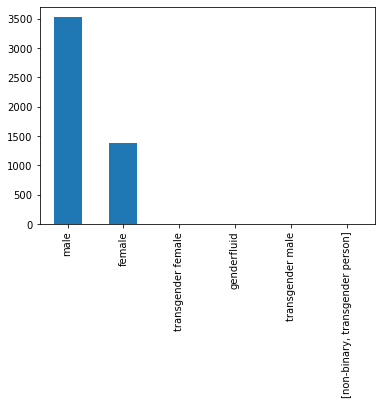

In [23]:
quotes['gender'].value_counts().plot.bar()